## TASK-4 Decision Tree Algorithm(Classification)


## Import all Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the file 

In [125]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
data.drop(['Id'],axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [128]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Divide Data into Attributes(input) and Labels(output)

In [129]:
x=data.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [130]:
y=data.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000653953CE80>,
      dtype=object)

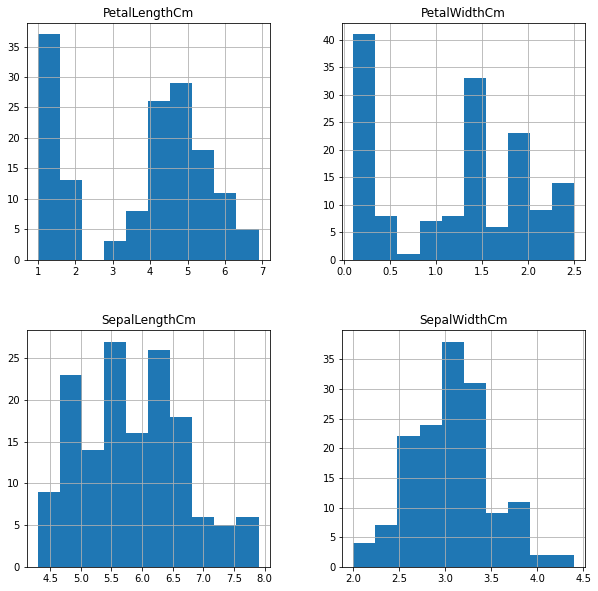

In [131]:
data.hist(figsize=(10,10))

## Pairwise Relationships in dataset

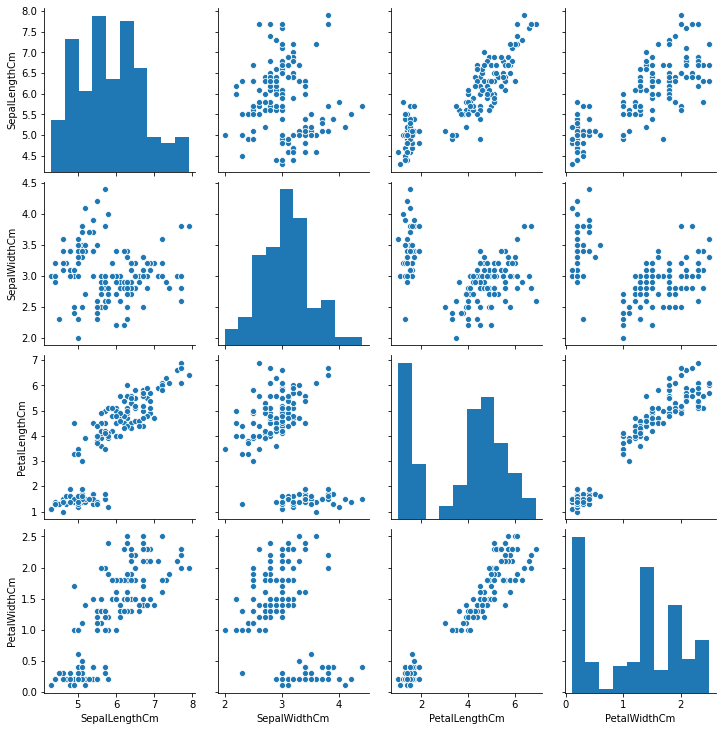

In [152]:
sns.pairplot(data)

In [133]:
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)

### Split the data into Training and test set 

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=40)

## Training the Decision Tree Algorithm

In [145]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=5,criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [146]:
y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)

### Accuracy and confusion matrix of Train Data

In [150]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy_score of train data =",accuracy_score(y_train_predict,y_train)*100,"%")
print("confusion_matrix:")
print(confusion_matrix(y_train_predict,y_train))

accuracy_score of train data = 100.0 %
confusion_matrix:
[[34  0  0]
 [ 0 36  0]
 [ 0  0 35]]


### Accuracy and confusion matrix of Test Data

In [151]:
print("accuracy_score of test data=",accuracy_score(y_test_predict,y_test)*100,"%")
print("confusion_matrix:")
print(confusion_matrix(y_test_predict,y_test))

accuracy_score of test data= 100.0 %
confusion_matrix:
[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


## Visualize the Decision Tree

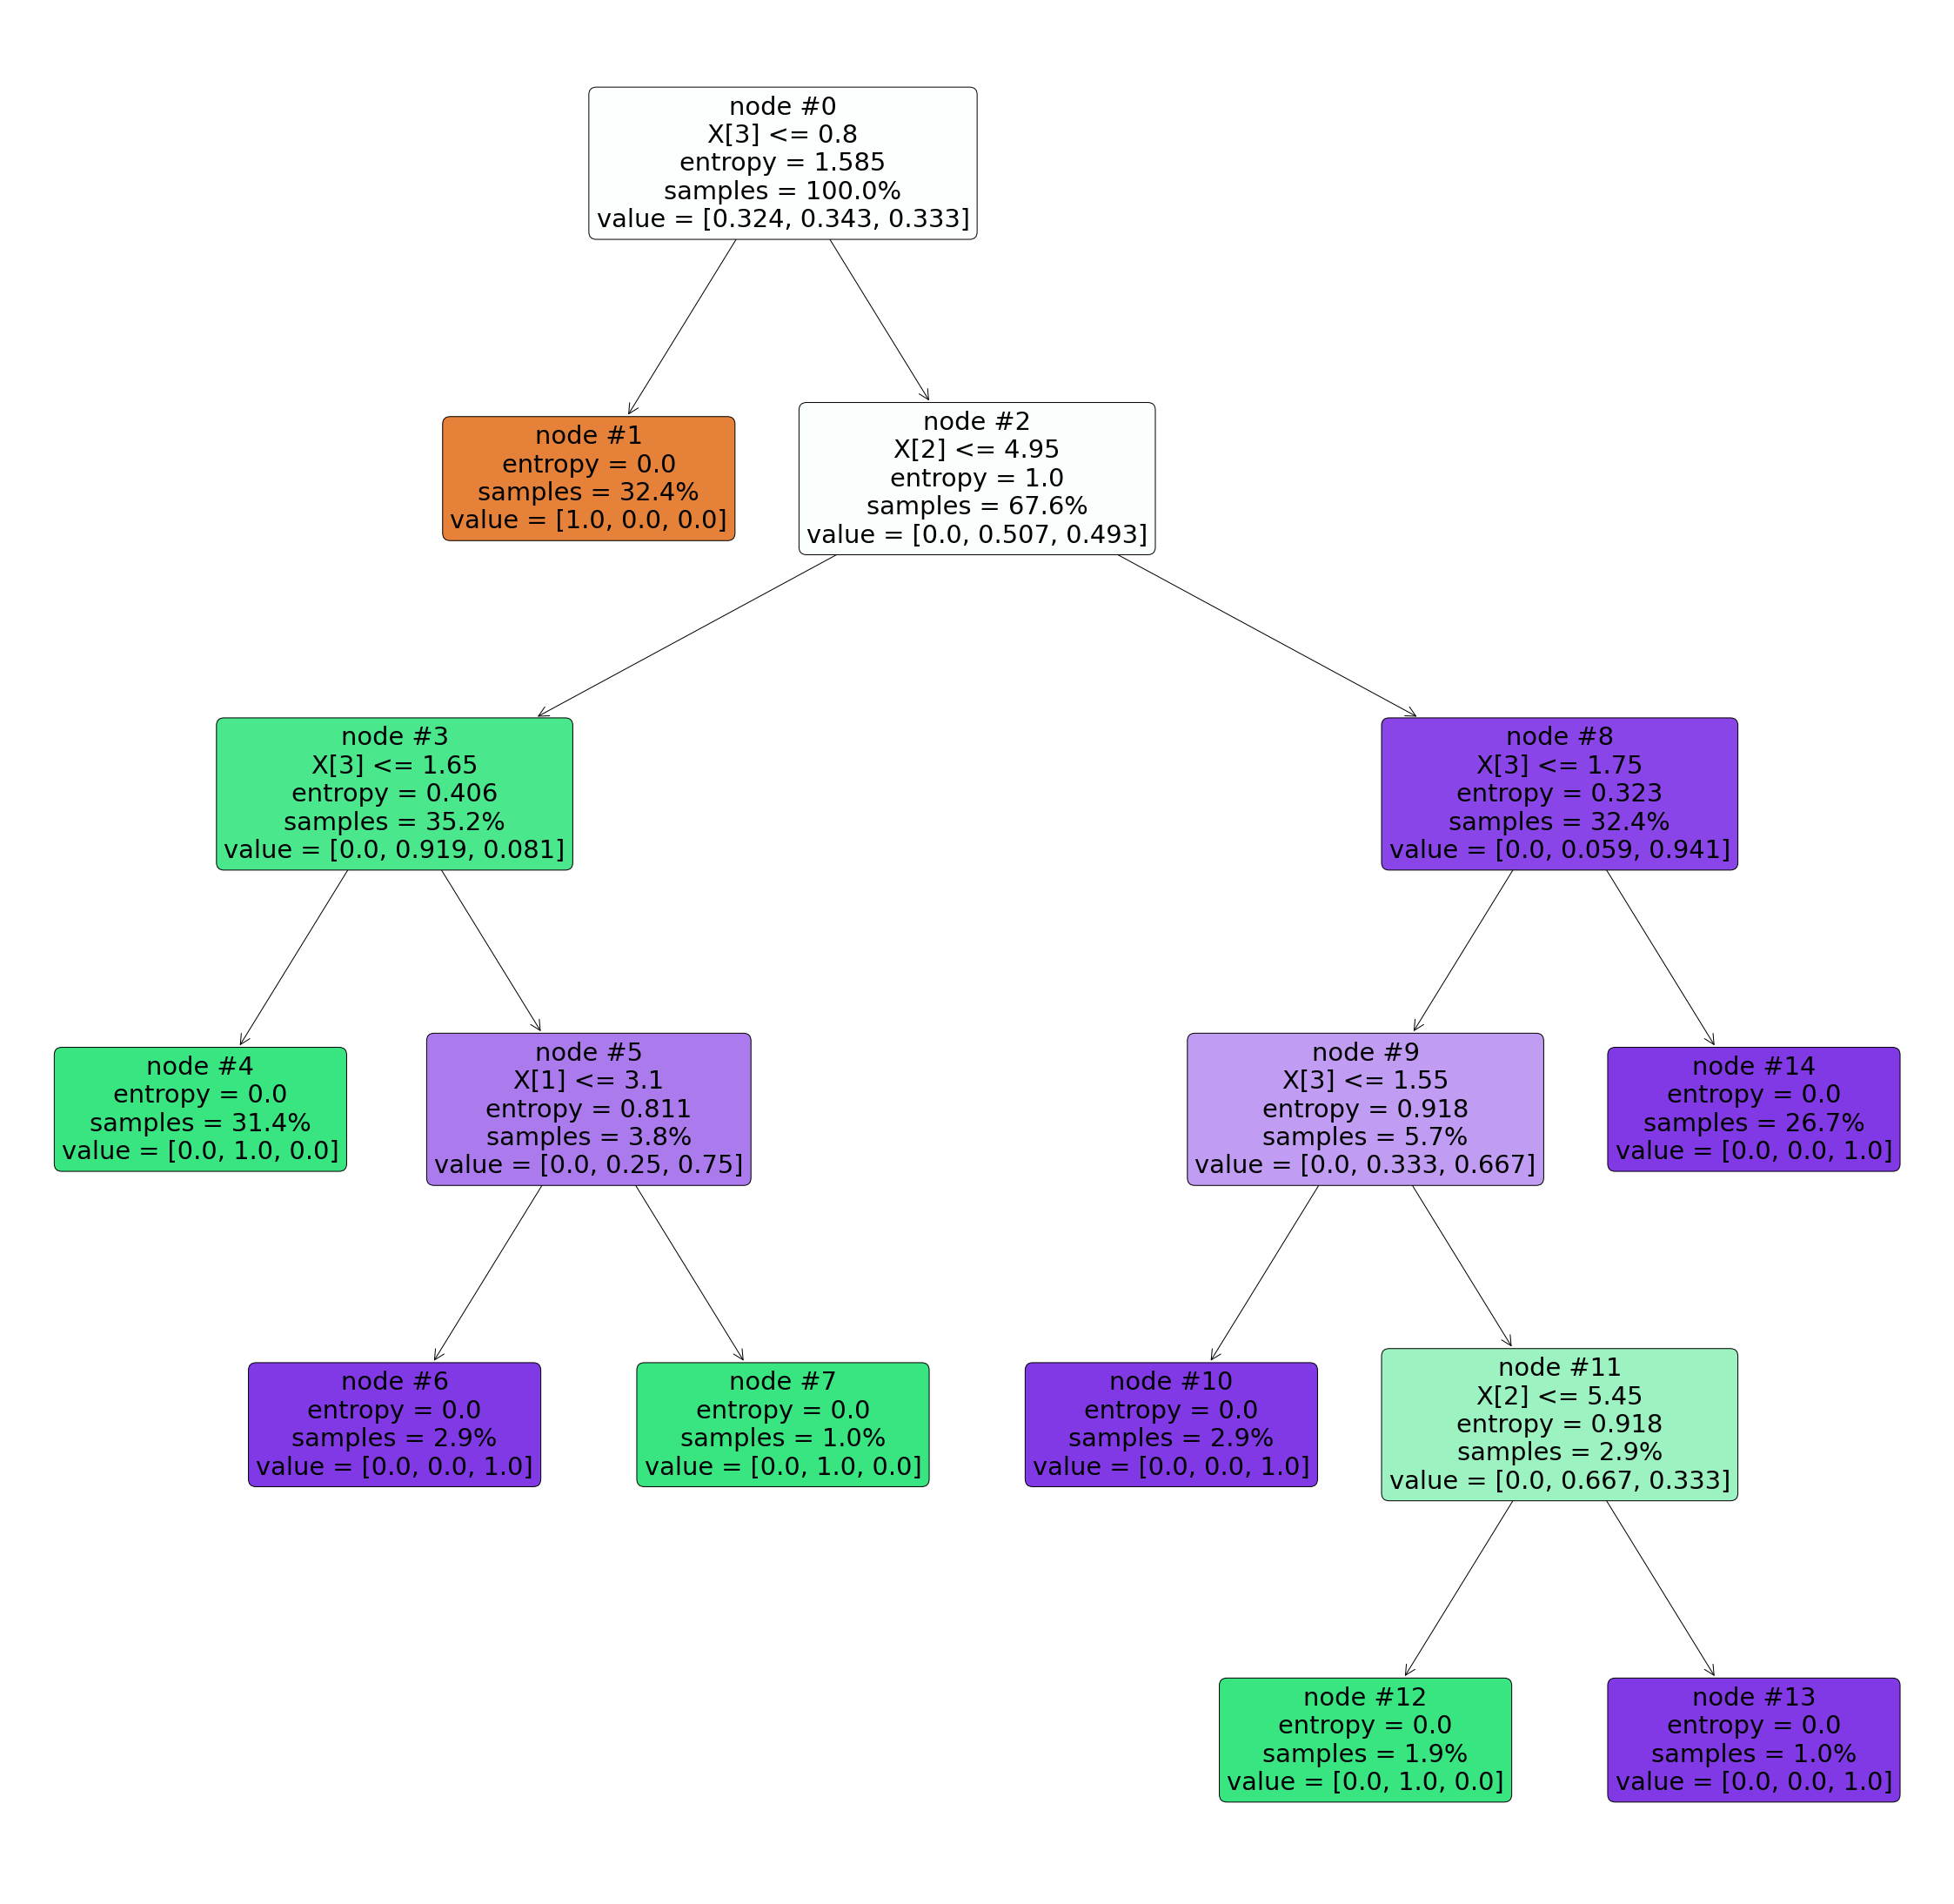

In [149]:
from sklearn import tree
plt.figure(figsize=(40,40))
tree.plot_tree(clf,filled=True,rounded=True,proportion=True,node_ids=True)
plt.show()